In [1]:
from mongodbcredentials import CONNECTION_STRING
from pymongo import MongoClient
import certifi
from textblob import TextBlob
from reddit_modules import get_top_subreddits, save_results, database_as_textblob, pos_neg_count, top_subr_counts, plot_sentiment_top10, plot_topics

In [2]:
client = MongoClient(CONNECTION_STRING, tlsCAFile=certifi.where())

In [3]:
reddit_facemasks = client.RedditFacemasks
reddit_lockdown = client.RedditLockdown
reddit_pcr = client.RedditPCR
reddit_pfizer = client.RedditPfizer
reddit_quarantine = client.RedditQuarantine
reddit_restrictions = client.RedditRestrictions
reddit_vaccine = client.RedditVaccination

In [4]:
facemasks_count = get_top_subreddits(reddit_facemasks)
lockdown_count = get_top_subreddits(reddit_lockdown)
pcr_count = get_top_subreddits(reddit_pcr)
pfizer_count = get_top_subreddits(reddit_pfizer)
quarantine_count = get_top_subreddits(reddit_quarantine)
restrictions_count = get_top_subreddits(reddit_restrictions)
vaccine_count = get_top_subreddits(reddit_vaccine)

In [5]:
facemasks_dict = database_as_textblob(reddit_facemasks)
lockdown_dict = database_as_textblob(reddit_lockdown)
pcr_dict = database_as_textblob(reddit_pcr)
pfizer_dict = database_as_textblob(reddit_pfizer)
quarantine_dict = database_as_textblob(reddit_quarantine)
restrictions_dict = database_as_textblob(reddit_restrictions)
vaccine_dict = database_as_textblob(reddit_vaccine)

In [6]:
facemasks_sum, facemasks_sentiment = pos_neg_count(facemasks_dict)
lockdown_sum, lockdown_sentiment = pos_neg_count(lockdown_dict)
pcr_sum, pcr_sentiment = pos_neg_count(pcr_dict)
pfizer_sum, pfizer_sentiment = pos_neg_count(pfizer_dict)
quarantine_sum, quarantine_sentiment = pos_neg_count(quarantine_dict)
restrictions_sum, restrictions_sentiment = pos_neg_count(restrictions_dict)
vaccine_sum, vaccine_sentiment = pos_neg_count(vaccine_dict)

In [7]:
fmasks_subr, fmasks_datapts = top_subr_counts(facemasks_count , facemasks_sentiment)
ldown_subr, ldown_datapts = top_subr_counts(lockdown_count, lockdown_sentiment)
pcr_subr, pcr_datapts = top_subr_counts(pcr_count, pcr_sentiment)
pfizer_subr, pfizer_datapts = top_subr_counts(pfizer_count, pfizer_sentiment)
qtine_subr, qtine_datapts = top_subr_counts(quarantine_count, quarantine_sentiment)
rtions_subr, rtions_datapts = top_subr_counts(restrictions_count, restrictions_sentiment)
vac_subr, vac_datapts = top_subr_counts(vaccine_count, vaccine_sentiment)

<Figure size 432x288 with 0 Axes>

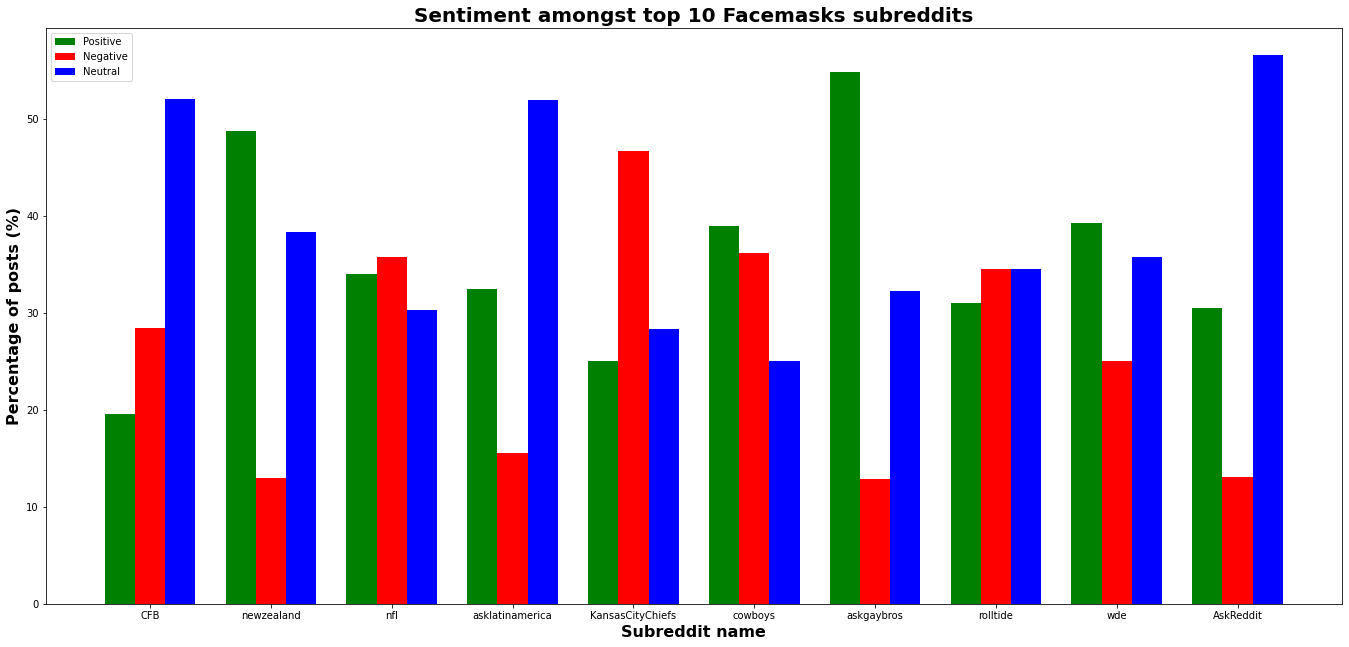

<Figure size 432x288 with 0 Axes>

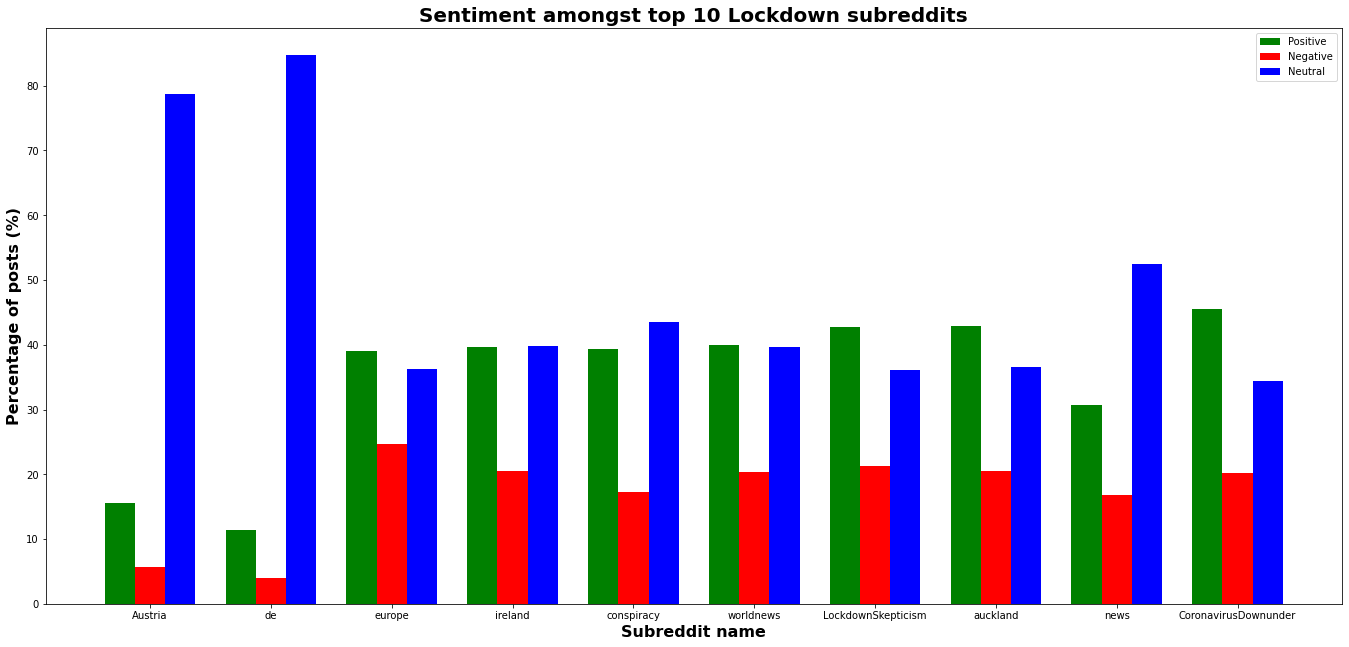

<Figure size 432x288 with 0 Axes>

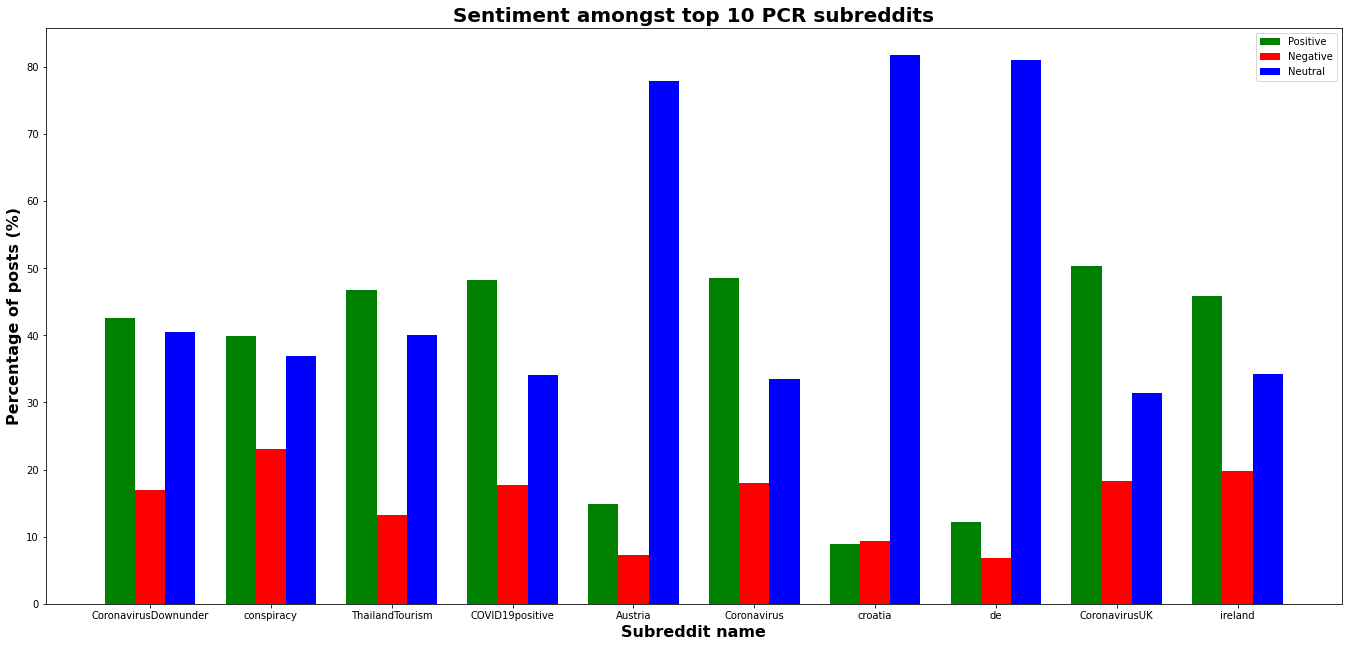

<Figure size 432x288 with 0 Axes>

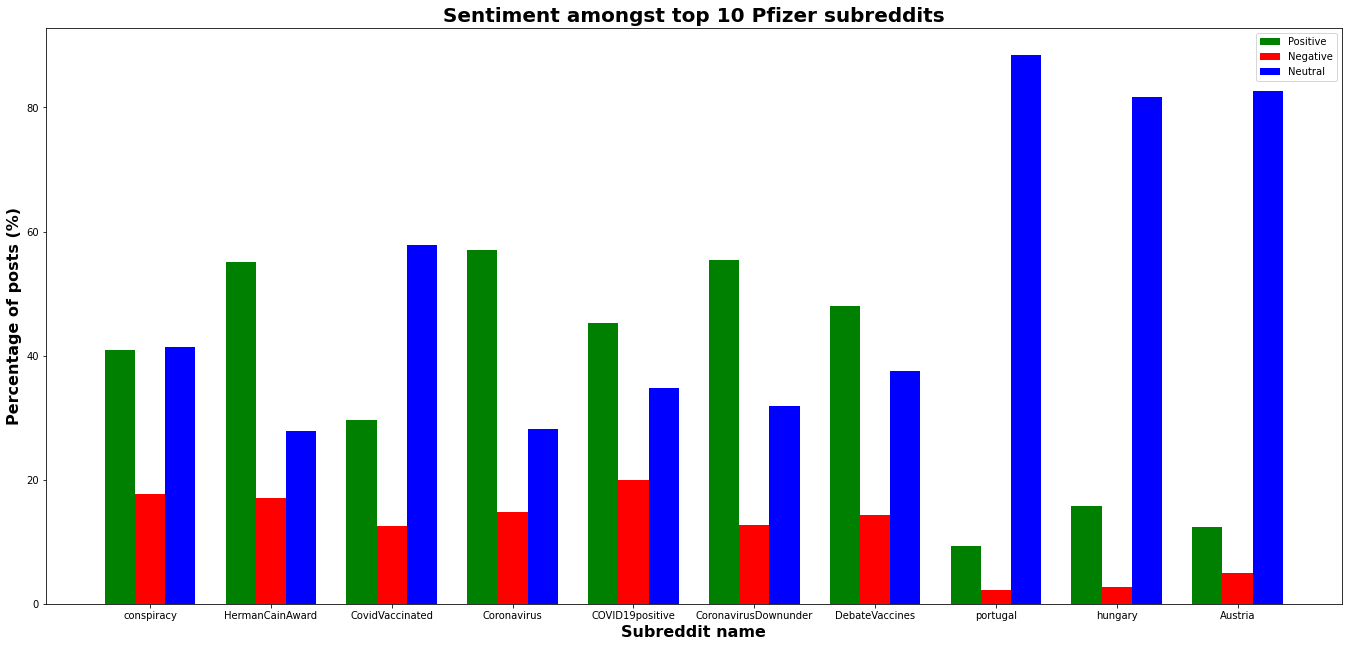

<Figure size 432x288 with 0 Axes>

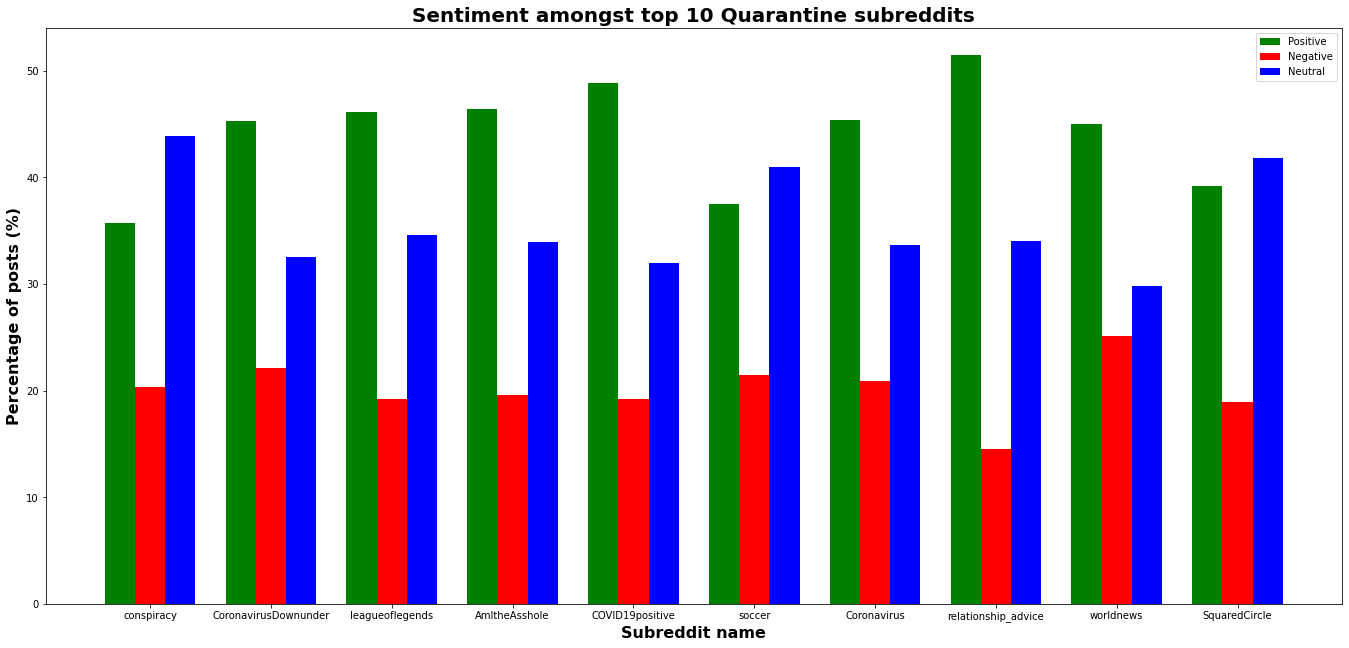

<Figure size 432x288 with 0 Axes>

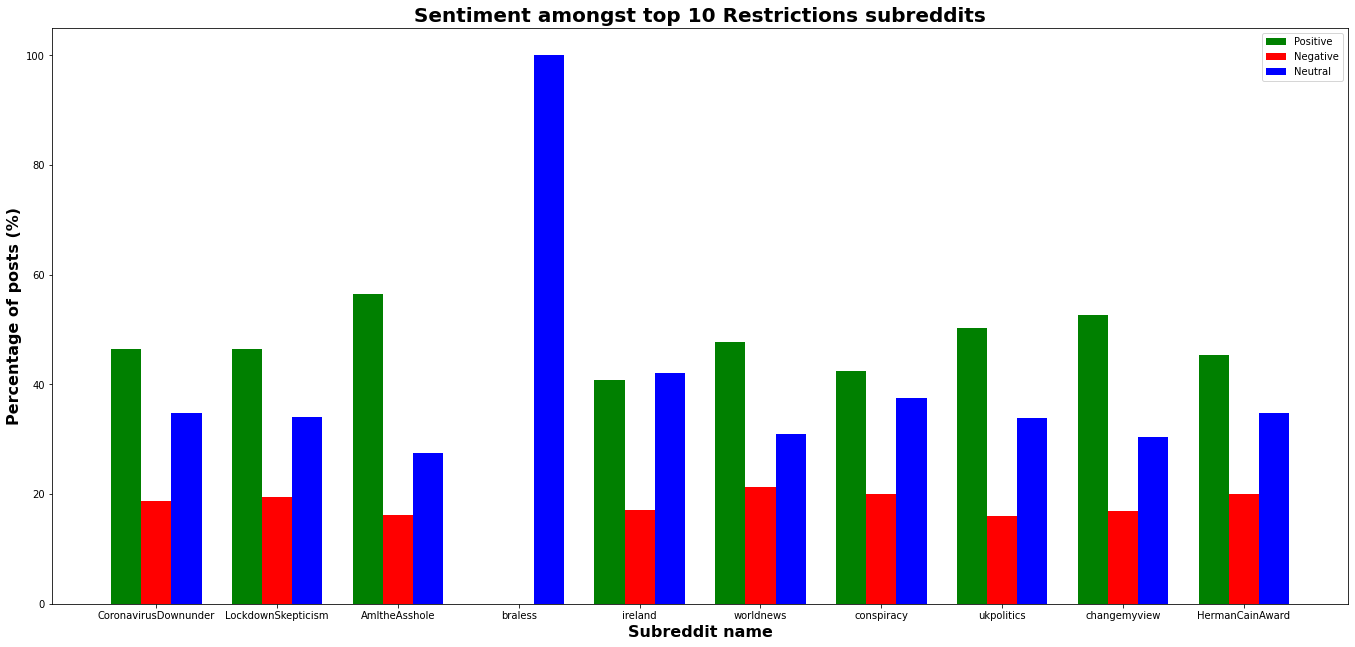

<Figure size 432x288 with 0 Axes>

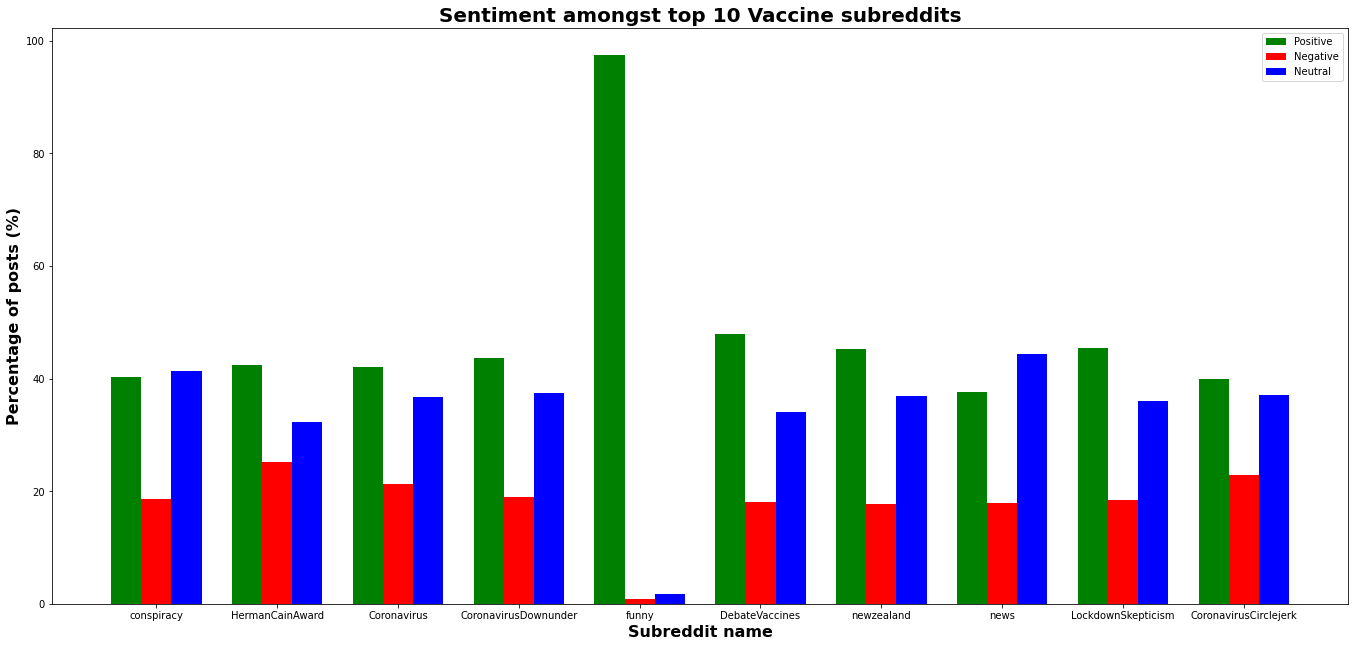

In [8]:
plot_sentiment_top10("Facemasks", fmasks_subr, fmasks_datapts)
plot_sentiment_top10("Lockdown", ldown_subr, ldown_datapts)
plot_sentiment_top10("PCR", pcr_subr, pcr_datapts)
plot_sentiment_top10("Pfizer", pfizer_subr, pfizer_datapts)
plot_sentiment_top10("Quarantine", qtine_subr, qtine_datapts)
plot_sentiment_top10("Restrictions", rtions_subr, rtions_datapts)
plot_sentiment_top10("Vaccine", vac_subr, vac_datapts)

In [9]:
list_of_topics = ['Facemasks', 'Lockdown', 'PCR', 'Pfizer', 'Quarantine', 'Restrictions', 'Vaccine']

In [10]:
query_dpts = []
positive = []
negative = []
neutral = []

for sentiment in facemasks_sum, lockdown_sum, pcr_sum, pfizer_sum, quarantine_sum, restrictions_sum, vaccine_sum:
    positive += [sentiment['pos_perc']]
    negative += [sentiment['neg_perc']]
    neutral += [sentiment['neu_perc']]

query_dpts += [positive, negative, neutral]

<Figure size 432x288 with 0 Axes>

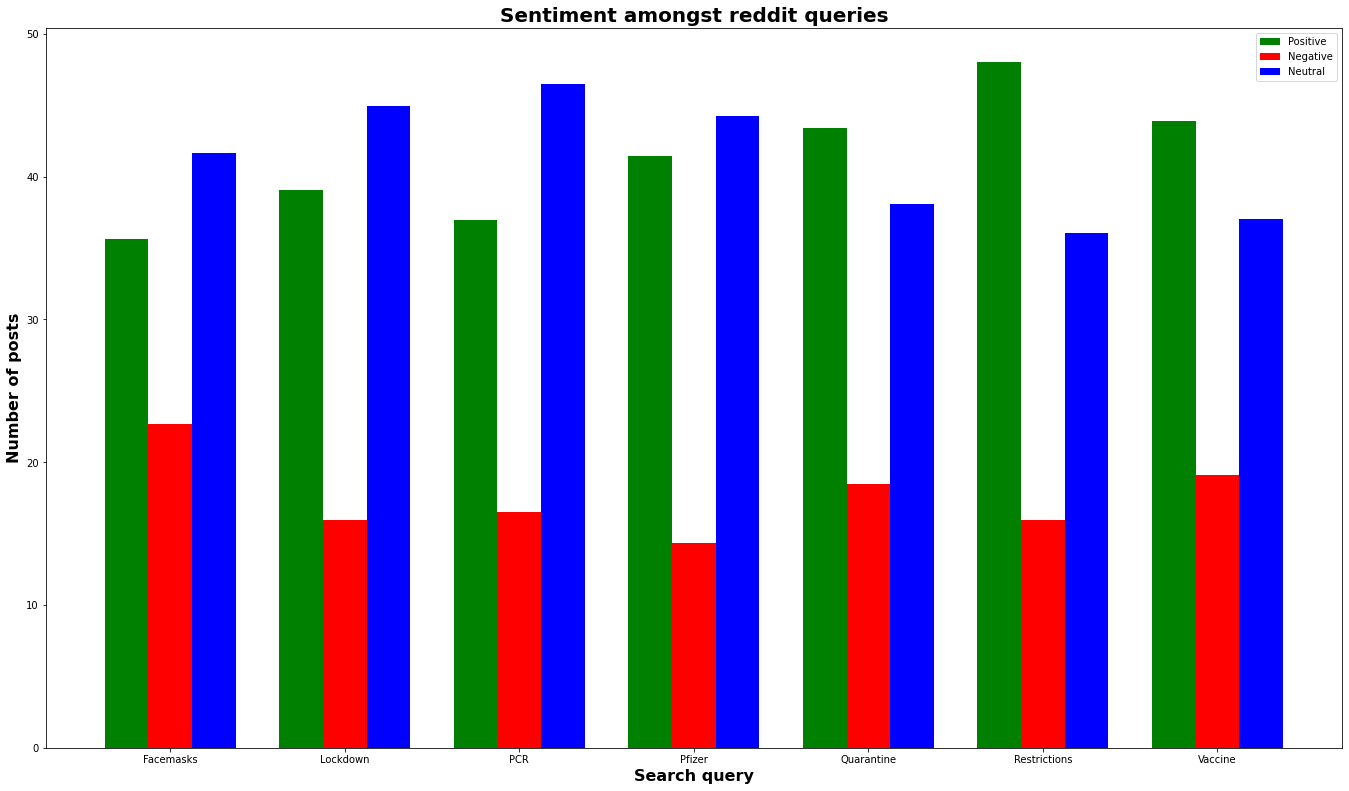

In [11]:
plot_topics(list_of_topics, query_dpts)